# Question 2: ANN (1.0 điểm)
- Software to detect network intrusions protects a computer network
from unauthorized users, including perhaps insiders. The intrusion
detector learning task is to build a predictive model (i.e. a classifier)
capable of distinguishing between 'bad' connections, called intrusions
or attacks, and 'good' normal connections.
- Read more: https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data
### Requirement: 
- Use KDD dataset (kddcup.data.gz)  to try to classify a connection as 'normal.' or others.
- Make a new prediction for each sample in KDD test dataset (kddcup.testdata.unlabeled.gz).

**KDD Cup 1999 Data Description And Type**
- https://kdd.ics.uci.edu/databases/kddcup99/task.html

| Feature      | Description | Type     |
| :---        |    :----   |          --- |
duration 	|	length (number of seconds) of the connection 	|	continuous
protocol_type 	|	type of the protocol, e.g. tcp, udp, etc. 	|	discrete
service 	|	network service on the destination, e.g., http, telnet, etc. 	|	discrete
src_bytes 	|	number of data bytes from source to destination 	|	continuous
dst_bytes 	|	number of data bytes from destination to source 	|	continuous
flag 	|	normal or error status of the connection 	|	discrete 
land 	|	1 if connection is from/to the same host/port; 0 otherwise 	|	discrete
wrong_fragment 	|	number of ``wrong'' fragments 	|	continuous
urgent 	|	number of urgent packets 	|	continuous
hot 	|	number of ``hot'' indicators	|	continuous
num_failed_logins 	|	number of failed login attempts 	|	continuous
logged_in 	|	1 if successfully logged in; 0 otherwise 	|	discrete
num_compromised 	|	number of ``compromised'' conditions 	|	continuous
root_shell 	|	1 if root shell is obtained; 0 otherwise 	|	discrete
su_attempted 	|	1 if ``su root'' command attempted; 0 otherwise 	|	discrete
num_root 	|	number of ``root'' accesses 	|	continuous
num_file_creations 	|	number of file creation operations 	|	continuous
num_shells 	|	number of shell prompts 	|	continuous
num_access_files 	|	number of operations on access control files 	|	continuous
num_outbound_cmds	|	number of outbound commands in an ftp session 	|	continuous
is_hot_login 	|	1 if the login belongs to the ``hot'' list; 0 otherwise 	|	discrete
is_guest_login 	|	1 if the login is a ``guest''login; 0 otherwise 	|	discrete
count 	|	number of connections to the same host as the current connection in the past two seconds 	|	continuous
Note: The following  features refer to these same-host connections.	|	
serror_rate 	|	% of connections that have ``SYN'' errors 	|	continuous
rerror_rate 	|	% of connections that have ``REJ'' errors 	|	continuous
same_srv_rate 	|	% of connections to the same service 	|	continuous
diff_srv_rate 	|	% of connections to different services 	|	continuous
srv_count 	|	number of connections to the same service as the current connection in the past two seconds 	|	continuous
Note: The following features refer to these same-service connections.	|	
srv_serror_rate 	|	% of connections that have ``SYN'' errors 	|	continuous
srv_rerror_rate 	|	% of connections that have ``REJ'' errors 	|	continuous
srv_diff_host_rate 	|	% of connections to different hosts 	|	continuous 




- https://www.researchgate.net/figure/The-41-features-provided-by-the-KDD-Cup-99-datasets_tbl1_263274883

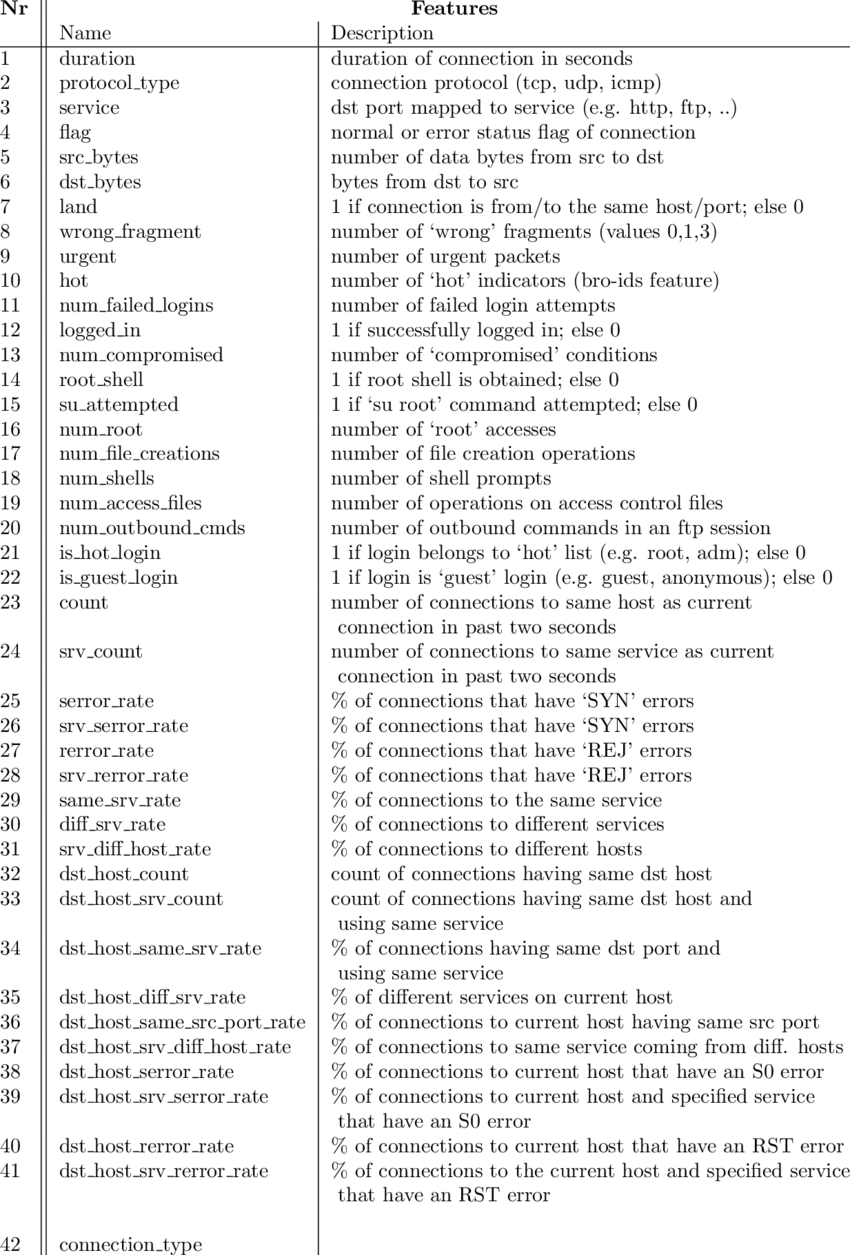

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [6]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


### **EDA (Exploratory Data Analysis)**

In [7]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 
                 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
                 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
                 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
                 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 
                 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
                 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
                 'dst_host_srv_rerror_rate', 'connection_type']


In [8]:
df = pd.read_csv('data/Dataset/kddcup.data.gz', names = column_names)

In [9]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection_type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [10]:
'''
Quan sát dataset và so sánh từ 2 KDD description dataset:
KDD có 31 features: https://kdd.ics.uci.edu/databases/kddcup99/task.html 
KDD có 42 features (dataset được sử dụng): https://www.researchgate.net/figure/The-41-features-provided-by-the-KDD-Cup-99-datasets_tbl1_263274883 

ta có thể đoán được dataset đã được tiền xử lý, trong đó, có một vài column đã dc OneHotEndCoder 
'''

'\nQuan sát dataset và so sánh từ 2 KDD description dataset:\nKDD có 31 features: https://kdd.ics.uci.edu/databases/kddcup99/task.html \nKDD có 42 features (dataset được sử dụng): https://www.researchgate.net/figure/The-41-features-provided-by-the-KDD-Cup-99-datasets_tbl1_263274883 \n\nta có thể đoán được dataset đã được tiền xử lý, trong đó, có một vài column đã dc OneHotEndCoder \n'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [12]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
df.duplicated().all()

False

In [14]:
with pd.option_context('display.max_columns', len(df)):
    print(df.describe(include='all'))

            duration protocol_type  service     flag     src_bytes  \
count   4.898431e+06       4898431  4898431  4898431  4.898431e+06   
unique           NaN             3       70       11           NaN   
top              NaN          icmp    ecr_i       SF           NaN   
freq             NaN       2833545  2811660  3744328           NaN   
mean    4.834243e+01           NaN      NaN      NaN  1.834621e+03   
std     7.233298e+02           NaN      NaN      NaN  9.414311e+05   
min     0.000000e+00           NaN      NaN      NaN  0.000000e+00   
25%     0.000000e+00           NaN      NaN      NaN  4.500000e+01   
50%     0.000000e+00           NaN      NaN      NaN  5.200000e+02   
75%     0.000000e+00           NaN      NaN      NaN  1.032000e+03   
max     5.832900e+04           NaN      NaN      NaN  1.379964e+09   

           dst_bytes          land  wrong_fragment        urgent  \
count   4.898431e+06  4.898431e+06    4.898431e+06  4.898431e+06   
unique           NaN   

In [15]:
numbers = [i for i in df.columns if df.dtypes[i] != "object"]
objects = [i for i in df.columns if df.dtypes[i] == "object"]

In [16]:
### xét các biến có dtype là object
i = 0
for obj in objects:
    print(
        i,
        "/",
        obj,
        "\t len =",
        len(df[obj].unique()),
        df[obj].unique() if len(df[obj].unique()) < 20 else "",
    )
    i = i + 1


0 / protocol_type 	 len = 3 ['tcp' 'udp' 'icmp']
1 / service 	 len = 70 
2 / flag 	 len = 11 ['SF' 'S2' 'S1' 'S3' 'OTH' 'REJ' 'RSTO' 'S0' 'RSTR' 'RSTOS0' 'SH']
3 / connection_type 	 len = 23 


In [17]:
### xét các biến có dtype != object
i = 0
for obj in numbers:
    print(
        i,
        "/",
        obj,
        "\t len =",
        len(df[obj].unique()),
        df[obj].unique() if len(df[obj].unique()) < 20 else "",
    )
    i = i + 1

0 / duration 	 len = 9883 
1 / src_bytes 	 len = 7195 
2 / dst_bytes 	 len = 21493 
3 / land 	 len = 2 [0 1]
4 / wrong_fragment 	 len = 3 [0 1 3]
5 / urgent 	 len = 6 [ 0  1  5  2  3 14]
6 / hot 	 len = 30 
7 / num_failed_logins 	 len = 6 [0 1 5 4 2 3]
8 / logged_in 	 len = 2 [1 0]
9 / num_compromised 	 len = 98 
10 / root_shell 	 len = 2 [0 1]
11 / su_attempted 	 len = 3 [0 2 1]
12 / num_root 	 len = 93 
13 / num_file_creations 	 len = 42 
14 / num_shells 	 len = 3 [0 1 2]
15 / num_access_files 	 len = 10 [0 1 2 4 6 5 3 9 7 8]
16 / num_outbound_cmds 	 len = 1 [0]
17 / is_host_login 	 len = 2 [0 1]
18 / is_guest_login 	 len = 2 [0 1]
19 / count 	 len = 512 
20 / srv_count 	 len = 512 
21 / serror_rate 	 len = 96 
22 / srv_serror_rate 	 len = 87 
23 / rerror_rate 	 len = 89 
24 / srv_rerror_rate 	 len = 76 
25 / same_srv_rate 	 len = 101 
26 / diff_srv_rate 	 len = 95 
27 / srv_diff_host_rate 	 len = 72 
28 / dst_host_count 	 len = 256 
29 / dst_host_srv_count 	 len = 256 
30 / dst_host

In [18]:
'''
Xác định thuộc tính:
predict (input): <> connection_type (các features khác connection_type)
target (output): connection_type

Nhận xét các features:
Vì dataset có quá nhiều features và về cơ bản, data đã được làm sạch (ko có null, ko duplicated),
nên dataset chỉ cần dùng phép scale là có thể sử dụng tốt cho việc build model.
Về các loại biến, về cơ bản dataset có 2 loại biến:
continuous: duration, src_bytes, dst_bytes, ... (các biến có các giá trị unique chiếm tỉ lệ không quá ít so với số lượng reacords)
categorical: protocol_type, flag, connection_type,  land  (các biến có các giá trị unique chiếm tỉ lệ khá ít so với số lượng reacords)

Về việc lựa chọn các features (features selection): ta chọn hết các features để build model vì ANN có thể chọn lọc features tốt.


'''

'\nXác định thuộc tính:\npredict (input): <> connection_type (các features khác connection_type)\ntarget (output): connection_type\n\nNhận xét các features:\nVì dataset có quá nhiều features và về cơ bản, data đã được làm sạch (ko có null, ko duplicated),\nnên dataset chỉ cần dùng phép scale là có thể sử dụng tốt cho việc build model.\nVề các loại biến, về cơ bản dataset có 2 loại biến:\ncontinuous: duration, src_bytes, dst_bytes, ... (các biến có các giá trị unique chiếm tỉ lệ không quá ít so với số lượng reacords)\ncategorical: protocol_type, flag, connection_type,  land  (các biến có các giá trị unique chiếm tỉ lệ khá ít so với số lượng reacords)\n\nVề việc lựa chọn các features (features selection): ta chọn hết các features để build model vì ANN có thể chọn lọc features tốt.\n\n\n'

In [19]:
'''
Cột num_outbound_cmds chỉ có 1 giá trị là 0 => loại bỏ column ko cần thiết này
'''

'\nCột num_outbound_cmds chỉ có 1 giá trị là 0 => loại bỏ column ko cần thiết này\n'

In [20]:
df = df.drop(columns = {'num_outbound_cmds'})

### **Phân tích target (connection_type)**
- Mặc dù ta tạm bỏ qua việc phân tích các features trong dataset, tuy nhiên việc phân tích biến target là điều bắt buộc vì đó là cơ sở để ta xem xét chiến lược build model như thế nào

In [21]:
def categorical_univariate_variable(f):
    print('1\ Số giá trị unique: ', f.nunique())
    print("2\ Mật độ phân phối: \n", f.value_counts())
    print("3\ Số giá trị NaN: \n", f.isnull().sum())
    print("\n\n4\ Tỉ lệ mật độ phân phối:\n", f.value_counts() / len(f))
    f.value_counts().plot.bar()
    plt.show() 

1\ Số giá trị unique:  23
2\ Mật độ phân phối: 
 smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: connection_type, dtype: int64
3\ Số giá trị NaN: 
 0


4\ Tỉ lệ mật độ phân phối:
 smurf.              5.732215e-01
neptune.            2.188491e-01
normal.             1.985903e-01
satan.              3.244304e-03
ipsweep.            2.547959e-03
portsweep.          2.125783e-03
nmap.               

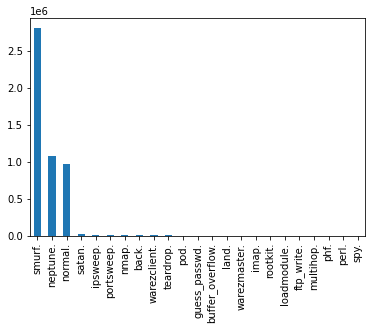

In [22]:
categorical_univariate_variable(df.connection_type)

In [23]:
'''
Dễ thấy, phân phối số lượng của connection type bị lệch nhiều,
với yêu cầu là 'Use KDD dataset (kddcup.data.gz) to try to classify a connection as 'normal.' or others'
=> trước hết ta gom thành 2 nhóm: normal và others
'''

"\nDễ thấy, phân phối số lượng của connection type bị lệch nhiều,\nvới yêu cầu là 'Use KDD dataset (kddcup.data.gz) to try to classify a connection as 'normal.' or others'\n=> trước hết ta gom thành 2 nhóm: normal và others\n"

In [24]:
df['connection_type_new'] = df['connection_type'].apply(lambda x: 'normal' if x == 'normal.' else 'orthers')

In [25]:
df.iloc[:10, -5:]

,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection_type,connection_type_new
0,0.0,0.0,0.0,normal.,normal
1,0.0,0.0,0.0,normal.,normal
2,0.0,0.0,0.0,normal.,normal
3,0.0,0.0,0.0,normal.,normal
4,0.0,0.0,0.0,normal.,normal
5,0.0,0.0,0.0,normal.,normal
6,0.0,0.0,0.0,normal.,normal
7,0.0,0.0,0.0,normal.,normal
8,0.0,0.0,0.0,normal.,normal
9,0.0,0.0,0.0,normal.,normal


1\ Số giá trị unique:  2
2\ Mật độ phân phối: 
 orthers    3925650
normal      972781
Name: connection_type_new, dtype: int64
3\ Số giá trị NaN: 
 0


4\ Tỉ lệ mật độ phân phối:
 orthers    0.80141
normal     0.19859
Name: connection_type_new, dtype: float64


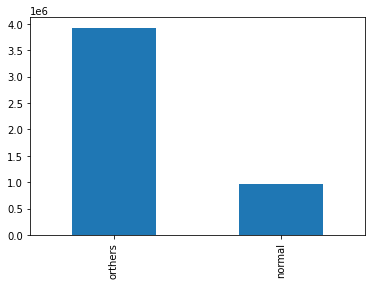

In [26]:
categorical_univariate_variable(df.connection_type_new)

In [27]:
'''
Dễ thấy, 2 nhóm bị mất cân bằng
=> model có thể bị ảnh hướng do sự mất cân bằng này.
=> sử dụng oversampling hoặc undersampling để xử lý
'''

'\nDễ thấy, 2 nhóm bị mất cân bằng\n=> model có thể bị ảnh hướng do sự mất cân bằng này.\n=> sử dụng oversampling hoặc undersampling để xử lý\n'

***Feature Engineering***

In [28]:
df_train = df.drop(columns={'connection_type', 'connection_type_new'})
df_test = df[['connection_type_new']]

In [29]:
df_train = pd.get_dummies(df_train, prefix=['protocol_type', 'service', 'flag'], drop_first=True)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# scale data
sc = StandardScaler()
X = sc.fit_transform(df_train)

In [32]:
df_test.connection_type_new = df_test.connection_type_new.apply(lambda x: 0 if x == 'normal' else 1)

In [33]:
y = df_test.to_numpy()

In [34]:
# X[:2]

In [35]:
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

### **1. Under Sampling**

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
rs = RandomUnderSampler()
X_rs, y_rs = rs.fit_resample(X, y)

In [38]:
print(sorted(Counter(y_rs).items()))

[(0, 972781), (1, 972781)]


***Data Split***

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_rs_train, X_rs_test, y_rs_train, y_rs_test = train_test_split(X_rs, y_rs, test_size = 0.25, random_state = 42)

#### ***Build Model***

In [41]:
X_rs_train.shape, X_rs_test.shape

((1459171, 118), (486391, 118))

In [42]:
y_rs_train.shape, y_rs_test.shape

((1459171,), (486391,))

In [60]:
model_1 = keras.Sequential()
# add first layer and first hidden layer
model_1.add(layers.Dense(units=60, activation="relu", input_shape=(118,))) 
model_1.add(layers.BatchNormalization())
model_1.add(layers.Dropout(0.2))

# add second hidden layer
model_1.add(layers.Dense(60, activation="relu"))
model_1.add(layers.Dropout(0.2))
model_1.add(layers.BatchNormalization())

# add third hidden layer
model_1.add(layers.Dense(60, activation="relu"))
model_1.add(layers.Dropout(0.3))
model_1.add(layers.BatchNormalization())

# add output layer
model_1.add(layers.Dense(units = 1, activation='sigmoid'))

# compiling ANN
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

# rms = tf.keras.optimizers.RMSprop()
# sgd = tf.keras.optimizers.SGD(lr=0.1, decay=1e-2)
# model_2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])


In [44]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                7140      
                                                                 
 batch_normalization (BatchN  (None, 60)               240       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 60)               240       
 hNormalization)                                        

In [45]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

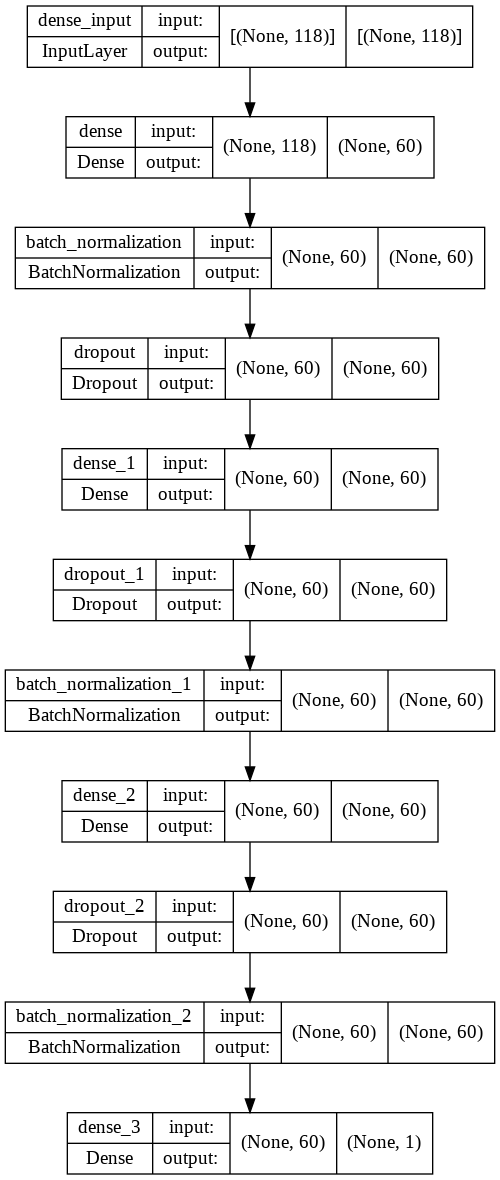

In [46]:
plot_model(model_1, show_shapes=True)


In [47]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [62]:
# Save the model according to the conditions  
model_check_point = ModelCheckpoint("/content/gdrive/MyDrive/LDS8_K275_ONLINE_DinhVietTrung/LDS8_K275_DinhVietTrung_Cuoi_ky/model/KDD_checkpoint_2.h5", 
                             monitor='val_acc', 
                             verbose=0, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             save_freq=1)

early_stopping = EarlyStopping(monitor='val_loss', 
                      min_delta=0.0001, 
                      patience=20, #20 
                      verbose=1, 
                      mode='auto', 
                      restore_best_weights=True)            

# learning_rate = ReduceLROnPlateau(patience=15,verbose=1,factor=0.5,min_delta=0.000001)


In [63]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [64]:
from datetime import datetime
t1 = datetime.now()
print(t1)

2022-06-12 08:47:12.317029


In [65]:
history = model_1.fit( X_rs_train, y_rs_train,
                       validation_data=(X_rs_test, y_rs_test),
                       batch_size=256,
                       epochs=200,
                        # callbacks=[early_stopping, model_check_point],
                        callbacks=[early_stopping],
                        use_multiprocessing=True,
                       verbose = 1)

Epoch 1/200
5700/5700 [==============================] - 29s 5ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 2/200
5700/5700 [==============================] - 27s 5ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 3/200
5700/5700 [==============================] - 27s 5ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 4/200
5700/5700 [==============================] - 27s 5ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 5/200
5700/5700 [==============================] - 27s 5ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 6/200
5700/5700 [==============================] - 28s 5ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 9.9028e-04 - val_accuracy: 0.9997
Epoch 7/200
5700/5700 [==============================] - 28s 5ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.00

In [66]:
t2 = datetime.now()
print(t2-t1)

0:23:09.210441


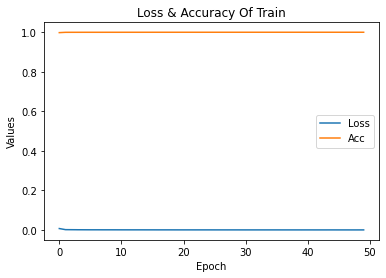

In [67]:
# loss và acc của train
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy Of Train')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()


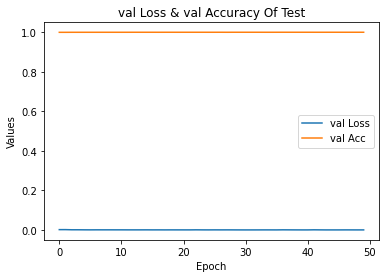

In [68]:
# loss và acc của test
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy Of Test')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

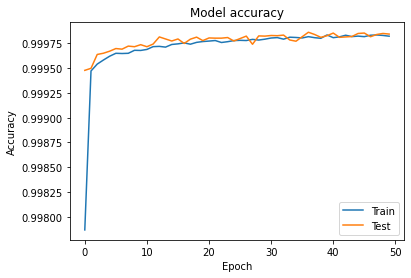

In [69]:
plt.figure()
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [57]:
'''
Từ kết quả trên, ta thấy loss của cả train và test đều rất nhỏ,
Acc của cả train và test đều rất cao, ko xảy ra hiện tượng overfitting!
'''

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# hàm đánh giá
def evaluate(model, X_train, X_test, y_train, y_test):
    yhat_test = model.predict(X_test)
    yhat_test = yhat_test >= 0.5
    yhat_train = model.predict(X_train)
    yhat_train = yhat_train >= 0.5

    train_evaluation = model.evaluate(X_rs_train, y_rs_train)
    test_evaluation = model.evaluate(X_rs_test, y_rs_test)

    print("***TRAINIG RESULTS***: \n==================================================")
    print("Train Accuracy Score:", train_evaluation[1])
    print("Train Loss:", train_evaluation[0])
    print("Confusion matrix: \n", confusion_matrix(y_train, yhat_train))
    train_clf_report = classification_report(y_train, yhat_train)
    print("Classification Report: \n", train_clf_report)


    print("***TEST RESULTS***: \n===================================================")
    print("Test Accuracy:", test_evaluation[1])
    print("Test Loss:", test_evaluation[0])
    print("Confusion matrix: \n", confusion_matrix(y_test, yhat_test))
    print("Test Accuracy Score:", accuracy_score(y_test, yhat_test))
    test_clf_report = classification_report(y_test, yhat_test)
    print("Classification Report: \n", test_clf_report)

In [93]:
evaluate(model_1, X_rs_train, X_rs_test, y_rs_train, y_rs_test)

15200/15200 [==============================] - 16s 1ms/step - loss: 7.3094e-04 - accuracy: 0.9998
***TRAINIG RESULTS***: 
Train Accuracy Score: 0.9998622536659241
Train Loss: 0.0004486845282372087
Confusion matrix: 
 [[729671     35]
 [   166 729299]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    729706
           1       1.00      1.00      1.00    729465

    accuracy                           1.00   1459171
   macro avg       1.00      1.00      1.00   1459171
weighted avg       1.00      1.00      1.00   1459171

***TEST RESULTS***: 
Test Accuracy: 0.9998232126235962
Test Loss: 0.0007309376960620284
Confusion matrix: 
 [[243058     17]
 [    69 243247]]
Test Accuracy Score: 0.9998231875178611
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    243075
           1       1.00      1.00      1.00    243316

    accuracy            

In [ ]:
'''
Xét từ yêu cầu: phân loại connection_type là normal hay others
Từ kết quả cho thấy, acc, loss của cả train và test đều rất cao,
Từ tập test cho thấy: giá trị của precision, recall và f1-score đều rất cao, 
xét confusion matrix của test, model chỉ dự đoán với class 0: sai 17 trường hợp trên tổng 243075 mẫu
                                              và với class 1 (others): sai 69 trường hợp trên tổng 243316 mẫu

=> model tốt, có thể sử dụng.
=> sử dụng luôn model này mà không cần phải kiểm thử bằng oversampling.
'''

In [94]:
# # save model
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model_CNN_new.h5'
model_1.save('LDS8_K275_DinhVietTrung_Cuoi_ky/model/kdd_under_sampling.h5')
print("save!!!")

save!!!
